In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [4]:
df = df.drop(['date'],axis=1)

In [5]:
df.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

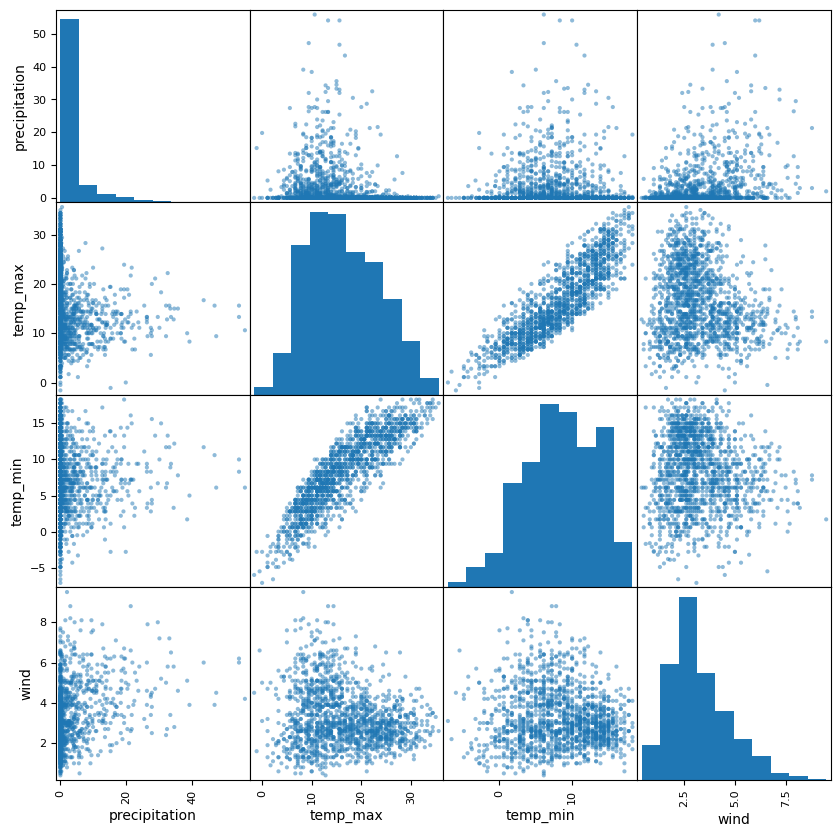

In [6]:
import pandas as pd

import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df, figsize=(10, 10))
plt.show()

<AxesSubplot: >

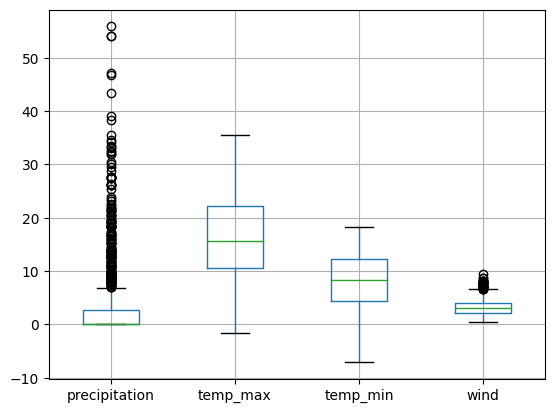

In [7]:
df.boxplot()

In [8]:
Q1 = df['precipitation'].quantile(0.25)
Q3 = df['precipitation'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['precipitation'] >= lower_bound) & (df['precipitation'] <= upper_bound)]

<AxesSubplot: >

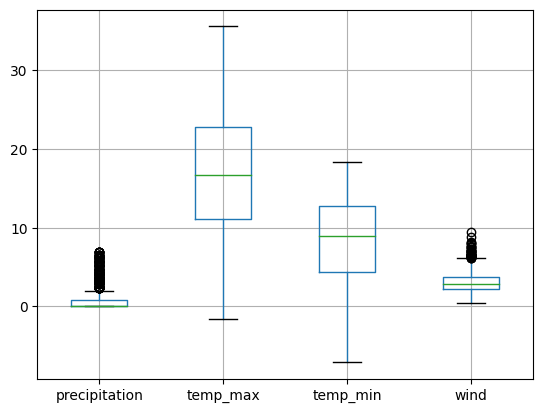

In [9]:
df.boxplot()

In [10]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
2,0.8,11.7,7.2,2.3,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
6,0.0,7.2,2.8,2.3,rain


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['precipitation','temp_max']] = scaler.fit_transform(df[['precipitation','temp_max']])
df.head()


,precipitation,temp_max,temp_min,wind,weather
0,-0.511352,-0.564311,5.0,4.7,drizzle
2,-0.008219,-0.710075,7.2,2.3,rain
4,0.306240,-1.081108,2.8,6.1,rain
5,1.060940,-1.677413,2.2,2.2,rain
6,-0.511352,-1.306379,2.8,2.3,rain


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


X = df.drop('weather',axis =1)
y = df['weather']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion matrix :\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n",classification_report(y_test,y_pred))

accuracy: 0.8247011952191236
confusion matrix :
 [[  0   0   0   0   8]
 [  0   3   0   0  19]
 [  0   0  87   0  11]
 [  0   0   1   2   0]
 [  3   2   0   0 115]]
classification_report :
               precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         8
         fog       0.60      0.14      0.22        22
        rain       0.99      0.89      0.94        98
        snow       1.00      0.67      0.80         3
         sun       0.75      0.96      0.84       120

    accuracy                           0.82       251
   macro avg       0.67      0.53      0.56       251
weighted avg       0.81      0.82      0.80       251

